# Example notebook showing Q-factor calculations

## Load in needed packages

In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
import os
import glob

## Set up nicer looking plots

In [2]:
matplotlib.style.use('seaborn-ticks')
matplotlib.rc('lines',linewidth=2)
matplotlib.rc('axes',labelsize=23)
matplotlib.rc('figure',figsize=(12,8))
matplotlib.rc('xtick',labelsize=30)
matplotlib.rc('ytick',labelsize=30)

## import the rv precision package

In [3]:
import rvprec

## Load and scan the pre-computed tables

In [4]:
qfiles = rvprec.index_qs('./output/')
ffiles = rvprec.index_fs(directory='./output_fluxes_add/')

## try some examples

Let's try calculating the expected precision for HPF on a 3000K star with J=8

First, load up the table for a specific type of star:

In [5]:
qdat,fdat = rvprec.get_data(3000,5.0,qfiles,ffiles,diag=True)

(True, './output/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.xz_q.npy', './output_fluxes_add/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.xz_flux_add.npy')


Each of these is a python dictionary, look at the available keys:

In [6]:
for i in qdat.keys():
    print(i)
print('')
for i in fdat.keys():
    print(i)

teff
resols
grav
chunk_lower_lims
chunk_upper_lims
vsinis
fname
tell_levels
q_dict

teff
grav
chunk_lower_lims
chunk_upper_lims
photlam_0
fname


Can check what's in each one by, for example:

In [7]:
print(qdat['resols'])

[  2000  10000  30000  50000  55000  60000  80000 100000 110000 120000
      0]


In [8]:
print(fdat['photlam_0'].keys())

['johnson,v', 'johnson,r', 'johnson,i', 'johnson,j', 'johnson,k', '2mass_rsr,j', '2mass_rsr,h', '2mass_rsr,ks']


As seen above, the flux scaling/magnitudes are calculated using the machinery and format of pysynphot

Let's make a quick plot to see what's there:

Text(0,0.5,'Normalized Flux -or- Information content')

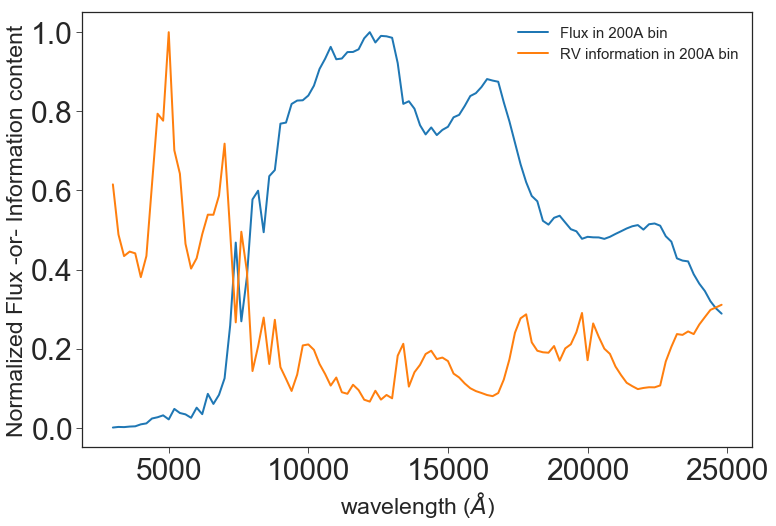

In [9]:
wavelengths = []
fluxes = []
qfactors = []

# "chunks" are the wavelengths bins on which the Qs and fluxes are calculated
# default table has 200A chunks

for i in qdat['chunk_lower_lims']:
    wavelengths.append(i)
    # plot flux in each chunk for a mag=0 star (in this case johnson V)
    fluxes.append(fdat['photlam_0']['johnson,v'][i])
    # also plot the RV quality factor for each chunk (e.g. Bouchy+2001)
    qfactors.append(qdat['q_dict'][50000][3][0][i])
plot(wavelengths,fluxes/amax(fluxes),label='Flux in 200A bin')
plot(wavelengths,qfactors/amax(qfactors),label='RV information in 200A bin')
legend(loc='best',fontsize=15)
xlabel(r'wavelength ($\AA$)')
ylabel('Normalized Flux -or- Information content')

Try an example for rvprec.calc_prec , using approximate parameters for APOGEE:

In [12]:
out = rvprec.calc_prec(qdat,fdat,15000,16800,30000,3.,2.5/2.,eff=.075,mag=10,magtype='2mass_rsr,h',
             exptime_s=900.,tell=.95,sampling_pix_per_resel=3.,beam_height_pix=3.,rdn_pix=4.)

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 



What's in the output? Can check the code or just look here:

In [14]:
for i in out.keys():
    print i

qs
fs
ws
sns
dv_all_photon
dv
dv_all
dv_photon
sns_photon


Overall precision in m/s is:

In [16]:
print(out['dv_all'])

19.983786805803774


## A much more complicated example

Here, we want to estimate the 30m/s limiting H-magnitude for the APOGEE spectrograph.

In [18]:
# want 30m/s limiting H mag

# look at a range of Teff's
teffs = arange(2800.,6000,100)
hlim = zeros_like(teffs)

# limiting V will be between 9 and 16, so these will be the values to consider
hmags = linspace(9.,16,10)

# iterate over each star
for i in range(len(teffs)):
    # calculate precision for each of a range of Hmags, then interpolate on prec vs H @ 30m/s
    precs = zeros_like(hmags)
    teff1 = teffs[i]
    print teff1
    
    # load in data
    qdat,fdat = rvprec.get_data(teffs[i],5.0,qfiles,ffiles)
    
    # loop over each mag
    for j in range(len(hmags)):
        out1 = rvprec.calc_prec(qdat,fdat,15000,16800,23000,3.,2.5/2.,eff=.075,mag=hmags[j],magtype='2mass_rsr,h',
             exptime_s=900.,tell=.95,mask_factor=0.1,sampling_pix_per_resel=3.,beam_height_pix=3.,rdn_pix=4.)
        precs[j] = out1['dv_all']
    hlim[i] = interp(30.,precs,hmags)

2800.0
Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

2900.0
Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

4000.0
Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell:

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

5100.0
Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell:

Text(0.5,1,'tell_filter=0.95, aperture=2.5m, eff= flat 7.5%, rdn=4e, vsini=3km/s')

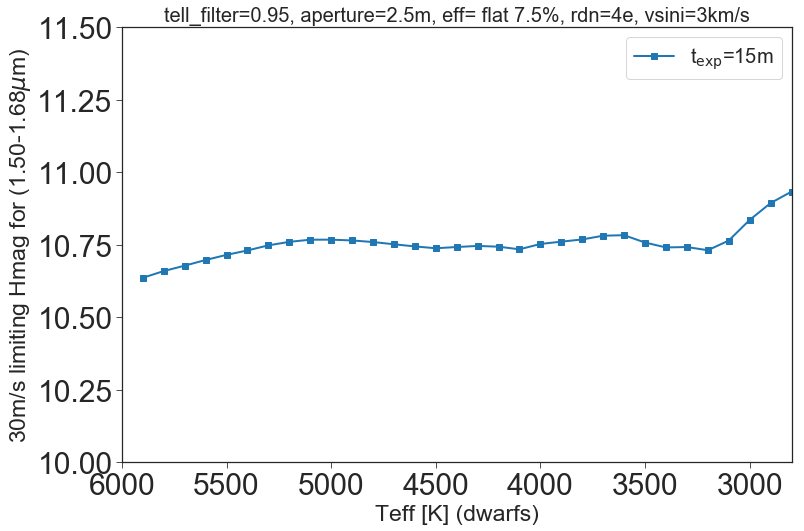

In [22]:
plot(teffs,hlim,'s-',label=r't$_{\mathrm{exp}}$=15m')
xlim(6000,2800)
xlabel('Teff [K] (dwarfs)')
legend(loc='best',fontsize=20,frameon='True')
ylim(10,11.5)
ylabel(r'30m/s limiting Hmag for (1.50-1.68$\mu$m)')
title('tell_filter=0.95, aperture=2.5m, eff= flat 7.5%, rdn=4e, vsini=3km/s',fontsize=20)

Plot RV precision as a function of SNR for 3000, 3500, 4000K

In [23]:
# estimate number of pixels in 200A chunk, for SNR scaling
dpix = 1.5e-6 / 22500. / 3.
print 200e-10 / dpix
#print (16800e-10-15000e-10)/dpix

900.0


In [25]:
teff_1 = 3000

exptimes = logspace(1,4)
precs = zeros_like(exptimes)
sns = zeros_like(exptimes)

hmag = 10

qdat,fdat = rvprec.get_data(teff_1,5.0,qfiles,ffiles)

# iterate over each star
for i in range(len(exptimes)):
    oo = rvprec.calc_prec(qdat,fdat,15000,16800,23000,3.,2.5/2.,eff=.075,mag=hmag,magtype='2mass_rsr,h',
             exptime_s=exptimes[i],tell=.95,mask_factor=0.1,sampling_pix_per_resel=3.,beam_height_pix=3.,rdn_pix=0.)
    
    precs[i] = oo['dv_all']
    sns[i] = mean(sqrt(oo['sns_photon']**2. / 900.))
sns_3000 = sns
precs_3000 = precs

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 


In [26]:
teff_1 = 3500

exptimes = logspace(1,4)
precs = zeros_like(exptimes)
sns = zeros_like(exptimes)

hmag = 10

qdat,fdat = rvprec.get_data(teff_1,5.0,qfiles,ffiles)

# iterate over each star
for i in range(len(exptimes)):
    oo = rvprec.calc_prec(qdat,fdat,15000,16800,23000,3.,2.5/2.,eff=.075,mag=hmag,magtype='2mass_rsr,h',
             exptime_s=exptimes[i],tell=.95,mask_factor=0.1,sampling_pix_per_resel=3.,beam_height_pix=3.,rdn_pix=0.)
    
    precs[i] = oo['dv_all']
    sns[i] = mean(sqrt(oo['sns_photon']**2. / 900.))
sns_3500 = sns
precs_3500 = precs

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 


In [27]:
teff_1 = 4000

exptimes = logspace(1,4)
precs = zeros_like(exptimes)
sns = zeros_like(exptimes)

hmag = 10

qdat,fdat = rvprec.get_data(teff_1,5.0,qfiles,ffiles)

# iterate over each star
for i in range(len(exptimes)):
    oo = rvprec.calc_prec(qdat,fdat,15000,16800,23000,3.,2.5/2.,eff=.075,mag=hmag,magtype='2mass_rsr,h',
             exptime_s=exptimes[i],tell=.95,mask_factor=0.1,sampling_pix_per_resel=3.,beam_height_pix=3.,rdn_pix=0.)
    
    precs[i] = oo['dv_all']
    sns[i] = mean(sqrt(oo['sns_photon']**2. / 900.))
sns_4000 = sns
precs_4000 = precs

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 15000 
 wl_2: 17000 
 Resol: 30000 
 vsini: 3.0 
 tell: 0.95 


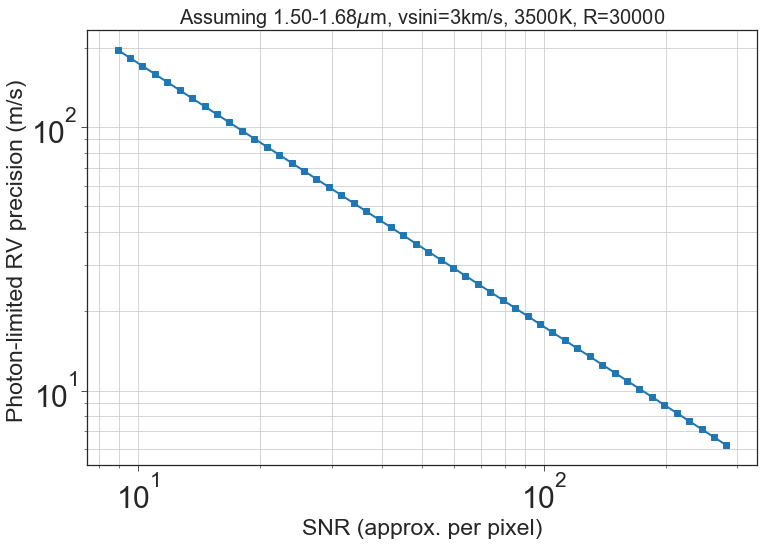

In [28]:
#plot(sns_3000,precs_3000,'s-')
plot(sns_3500,precs_3500,'s-')
xlabel('SNR (approx. per pixel)')
ylabel(r'Photon-limited RV precision (m/s) ')
#plot(sns_4000,precs_4000,'s-')
title('Assuming 1.50-1.68$\mu$m, vsini=3km/s, 3500K, R=30000',fontsize=20)
yscale('log')
xscale('log')
grid(which='both')